## Opis zmiennych w ramce danych

1. variety - Odmiana banana : (Blue Java, Burro, Cavendish, Fehi, Lady Finger, Manzano, Plantain, Red Dacca)
2. region - Kraj/region, w którym wyhodowano banana : (Brazil, Colombia, Costa Rica, Ecuador, Guatemala, Honduras, India, Philippines)
3. quality_category - Kategoria jakościowa banana : (Good, Premium, Processing, Unripe)
4. ripeness_index - Wskaźnik dojrzałości banana : (1.02 - 7.00)
5. ripeness_category - Kategoria określająca stopień dojrzałości : (Green, Overripe, Ripe, Turning)
6. sugar_content_brix - Zawartość cukru w bananie : (Brix – miara słodkości)
7. firmness_kgf - Twardość banana : (kgf – kilogram-siła)
8. length_cm - Długość banana w centymetrach
9. weight_g - Masa banana w gramach
10. harvest_date - Data zbioru banana
11. tree_age_years - Wiek drzewa bananowego
12. altitude_m - Wysokość nad poziomem morza, na której rosło drzewo
13. rainfall_mm - Suma opadów w regionie uprawy
14. soil_nitrogen_ppm - Zawartość azotu w glebie : (ppm - części na milion)

## Import potrzebnych bibliotek do analizy danych

In [103]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

## Wczytanie ramki danych

In [104]:
df = pd.read_csv("banana_quality_dataset.csv")
df.sample(5)

sample_id      variety       region  quality_score quality_category  \
45          46     Plantain        India           2.81             Good   
740        741      Manzano     Honduras           2.79             Good   
846        847  Lady Finger     Honduras           2.59             Good   
196        197  Lady Finger  Philippines           2.50       Processing   
739        740     Plantain        India           2.02       Processing   

     ripeness_index ripeness_category  sugar_content_brix  firmness_kgf  \
45             4.70              Ripe               20.06          3.67   
740            5.97              Ripe               17.56          4.57   
846            1.73             Green               20.51          4.87   
196            6.84          Overripe               18.22          4.74   
739            3.48           Turning               15.53          3.10   

     length_cm  weight_g harvest_date  tree_age_years  altitude_m  \
45       18.55    182.42   2023-10-02            15.7       574.6   
740      24.37    231.47   2023-10-28             5.1       905.6   
846      28.96    115.96   2023-10-29             9.5      1248.2   
196      10.51    205.55   2023-10-14             6.4       196.6   
739      22.43    157.45   2023-10-23            18.9       118.0   

     rainfall_mm  soil_nitrogen_ppm  
45        1201.5               15.7  
740       2198.7               11.8  
846       2866.2              171.1  
196       2354.6              150.4  
739       2181.5              131.2

In [105]:
df.shape

(1000, 16)

In [106]:
df['harvest_date'].sort_values()

468    2023-09-01
262    2023-09-01
824    2023-09-01
473    2023-09-01
580    2023-09-01
          ...    
847    2023-10-31
438    2023-10-31
287    2023-10-31
596    2023-10-31
125    2023-10-31
Name: harvest_date, Length: 1000, dtype: object

Usuwamy niepotrzebne kolumny - pierwszą kolumnę z numerami próbek (sample_id) oraz kolumnę quality_score w związku z tym, że jest ona jedną z dwóch do wyboru zmiennych celu (wraz z quality_category), a interesuje nas klasyfikacja wieloklasowa, więc wybieramy quality_category. Usuwamy też, harvest_date w związku z tym, że daty próbek są bardzo zbliżone do siebie.

In [107]:
df = df.drop(["sample_id",
             "quality_score",
             "harvest_date", 
             "ripeness_index",
             "ripeness_category"], 
             axis=1)

## Podział na zmienne kategoryczne i numeryczne

In [108]:
numerical_features = list(df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'category')].index)
categorical_features = list(df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')].index) 

## Obliczenie średniej, odchylenia standardowego, minimum, maksimum i wszystkich kwartyli w tym mediany

In [109]:
df.describe().transpose()

count        mean         std      min        25%  \
sugar_content_brix  1000.0    18.51683    2.034812    15.00    16.8275   
firmness_kgf        1000.0     2.70684    1.289252     0.50     1.5900   
length_cm           1000.0    19.88210    5.736318    10.00    14.9025   
weight_g            1000.0   164.73893   49.163073    81.05   122.3975   
tree_age_years      1000.0    10.87960    5.215554     2.00     6.3000   
altitude_m          1000.0   723.55670  427.372855     0.40   353.9500   
rainfall_mm         1000.0  1972.99280  564.467912  1000.50  1498.7500   
soil_nitrogen_ppm   1000.0   104.39130   53.607794    10.00    60.1500   

                         50%        75%      max  
sugar_content_brix    18.500    20.3125    21.98  
firmness_kgf           2.680     3.8200     5.00  
length_cm             19.890    24.8000    29.95  
weight_g             163.365   205.7750   249.89  
tree_age_years        10.700    15.6000    20.00  
altitude_m           726.000  1071.7250  1498.40  
rainfall_mm         1957.400  2431.8000  2992.00  
soil_nitrogen_ppm    104.100   149.8500   199.90

## Obliczenie skośności

In [110]:
df[numerical_features].skew()

sugar_content_brix   -0.022406
firmness_kgf          0.030561
length_cm             0.031794
weight_g              0.032442
tree_age_years        0.059766
altitude_m            0.063876
rainfall_mm           0.056509
soil_nitrogen_ppm     0.014225
dtype: float64

## Wyświetlenie typów kolumn

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   variety             1000 non-null   object 
 1   region              1000 non-null   object 
 2   quality_category    1000 non-null   object 
 3   sugar_content_brix  1000 non-null   float64
 4   firmness_kgf        1000 non-null   float64
 5   length_cm           1000 non-null   float64
 6   weight_g            1000 non-null   float64
 7   tree_age_years      1000 non-null   float64
 8   altitude_m          1000 non-null   float64
 9   rainfall_mm         1000 non-null   float64
 10  soil_nitrogen_ppm   1000 non-null   float64
dtypes: float64(8), object(3)
memory usage: 86.1+ KB


In [112]:
df.isnull().sum()>0

variety               False
region                False
quality_category      False
sugar_content_brix    False
firmness_kgf          False
length_cm             False
weight_g              False
tree_age_years        False
altitude_m            False
rainfall_mm           False
soil_nitrogen_ppm     False
dtype: bool

## Obsłużenie braków danych
Powyżej widać, że nie mamy braków danych, zatem nie musimy ich obsługiwać.

## Wykresy przed obsłużeniem outliers

### Histogramy

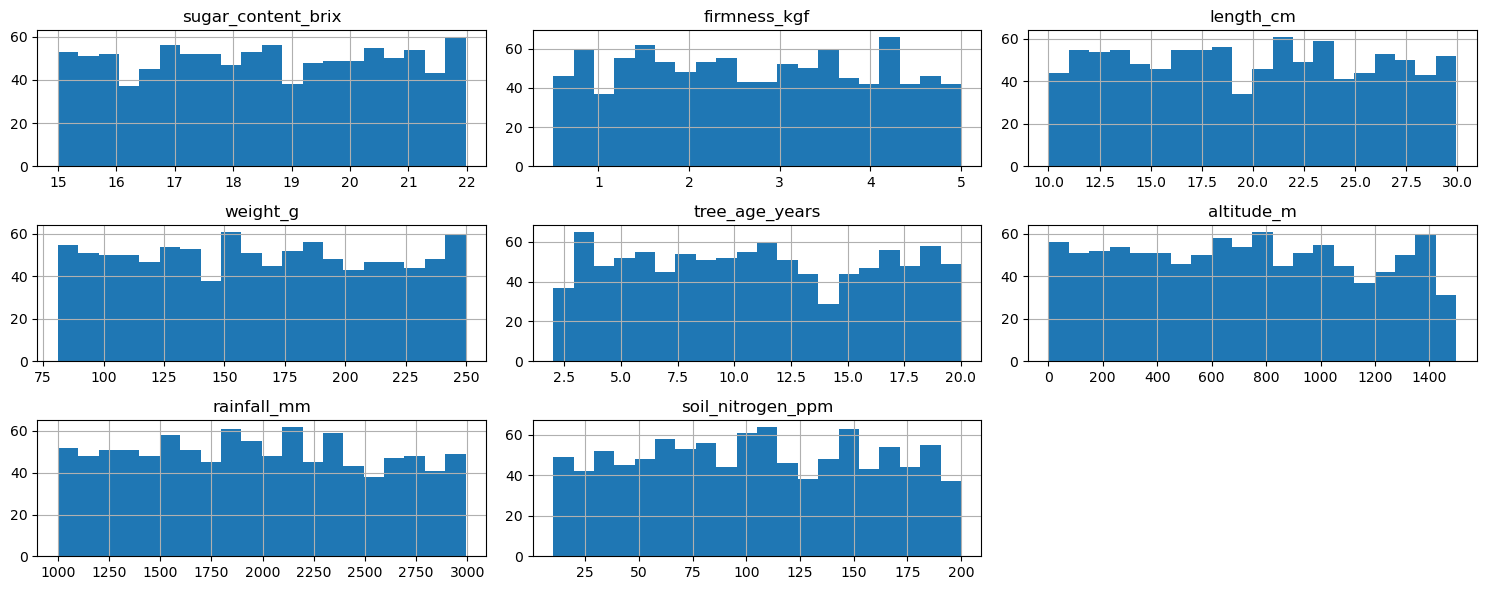

In [113]:
df.hist(bins=20, figsize=(15, 6), layout=(3, 3))
plt.tight_layout()
plt.show()

### Wykresy słupkowe

C:\Users\Kamil\AppData\Local\Temp\ipykernel_3536\1673519976.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Kamil\AppData\Local\Temp\ipykernel_3536\1673519976.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\Kamil\AppData\Local\Temp\ipykernel_3536\1673519976.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


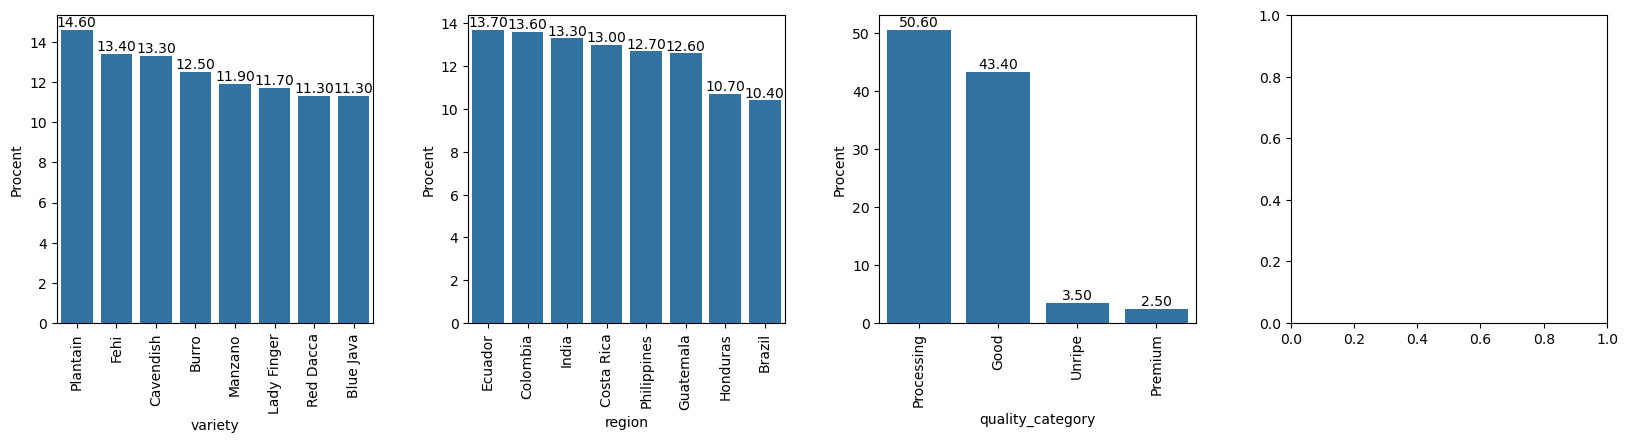

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
for ax, col in zip(axes.flatten(), categorical_features):
    percent = (df[col].value_counts()/len(df[col])*100).round(2)
    sns.barplot(x=percent.index, y=percent.values, ax=ax)
    ax.set_ylabel('Procent')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
fig.subplots_adjust(wspace=0.3, hspace=0.7)

### Scalenie wartości unripe z processing i premium z good dla etykiety quality_category

Ostatecznie powstaje: 
<ul>
<li><b>1</b> - banan dobry</li>
<li><b>0</b> - banan niedojżały</li>
</ul>

In [115]:
diction = {'Processing' : 0, 'Good' : 1 , 'Unripe': 0, 'Premium': 1}
df['quality_category'] = df['quality_category'].map(diction)

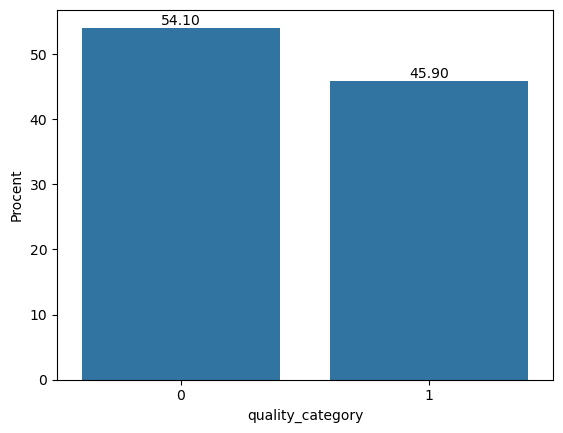

In [116]:
percents = df['quality_category'].value_counts()/df.shape[0]*100
ax = sns.barplot(x=percents.index, y=percents)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.ylabel('Procent');

### Wykresy pudełkowe

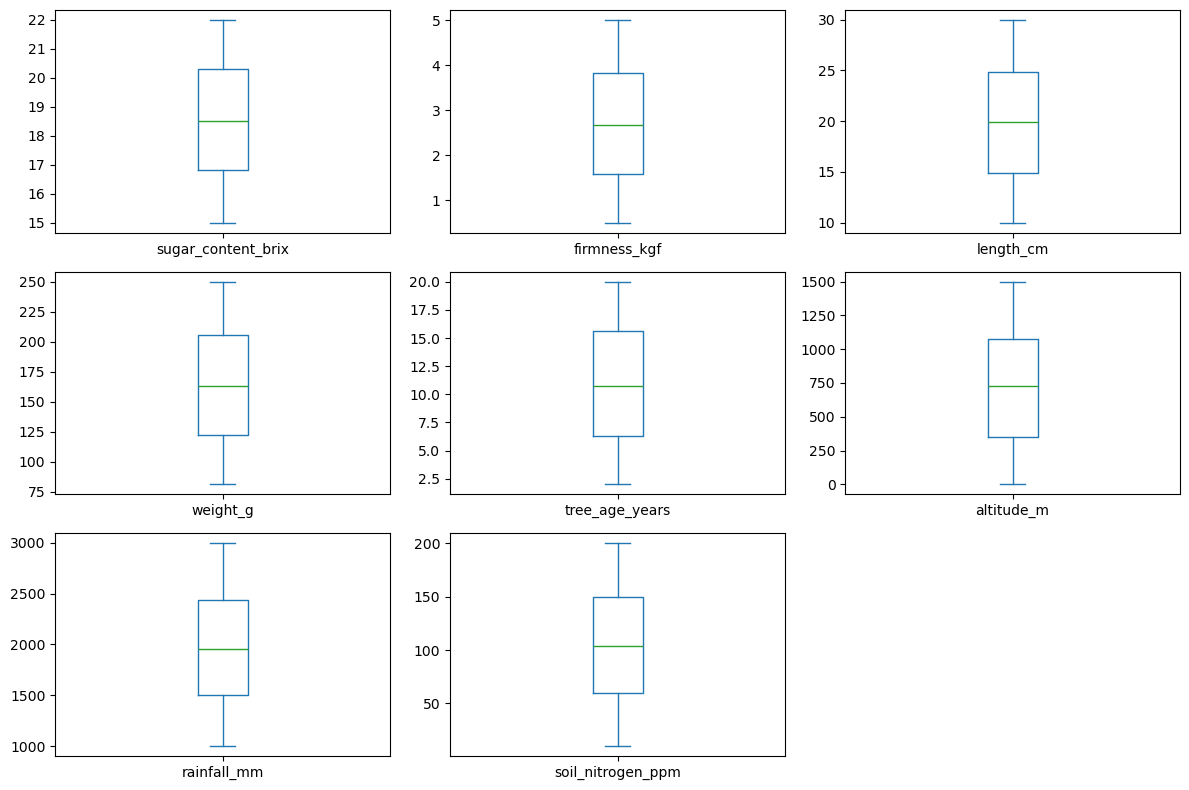

In [117]:
df[numerical_features].plot.box(subplots=True, layout=(3, 3), figsize=(12, 8))
plt.tight_layout()
plt.show()

## Obsługa outliers
Na powyższym wykresie można zauważyć, że nie ma outlierów, więc nie musimy ich obsługiwać.

## Obliczenie korelacji

In [118]:
df[numerical_features].corr()

sugar_content_brix  firmness_kgf  length_cm  weight_g  \
sugar_content_brix            1.000000     -0.013572  -0.008925 -0.020328   
firmness_kgf                 -0.013572      1.000000  -0.044788  0.040061   
length_cm                    -0.008925     -0.044788   1.000000 -0.055880   
weight_g                     -0.020328      0.040061  -0.055880  1.000000   
tree_age_years               -0.028472     -0.016933   0.020556  0.007971   
altitude_m                   -0.046773     -0.022841  -0.008890  0.012290   
rainfall_mm                  -0.005169      0.025458   0.028341 -0.031945   
soil_nitrogen_ppm             0.013128      0.004460   0.005156 -0.002808   

                    tree_age_years  altitude_m  rainfall_mm  soil_nitrogen_ppm  
sugar_content_brix       -0.028472   -0.046773    -0.005169           0.013128  
firmness_kgf             -0.016933   -0.022841     0.025458           0.004460  
length_cm                 0.020556   -0.008890     0.028341           0.005156  
weight_g                  0.007971    0.012290    -0.031945          -0.002808  
tree_age_years            1.000000    0.038132     0.001233           0.013124  
altitude_m                0.038132    1.000000    -0.049308          -0.008828  
rainfall_mm               0.001233   -0.049308     1.000000           0.017463  
soil_nitrogen_ppm         0.013124   -0.008828     0.017463           1.000000

## Generacja heat mapy korelacji

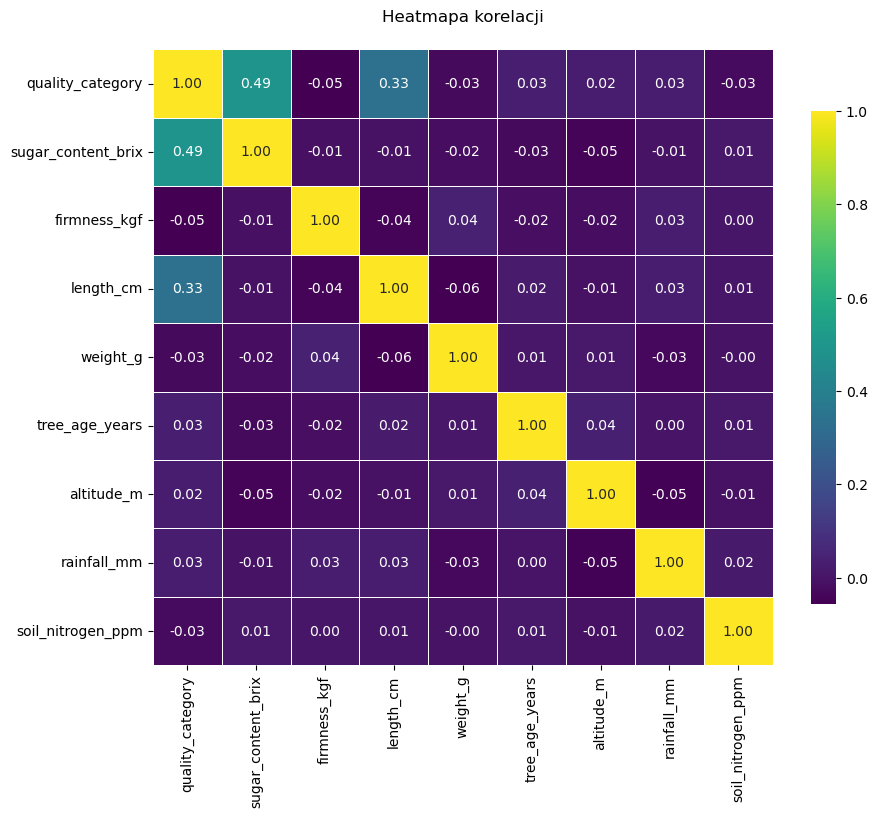

In [119]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",  
    cmap='viridis',  
    linewidths=.5,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.title("Heatmapa korelacji", pad=20)
plt.show()

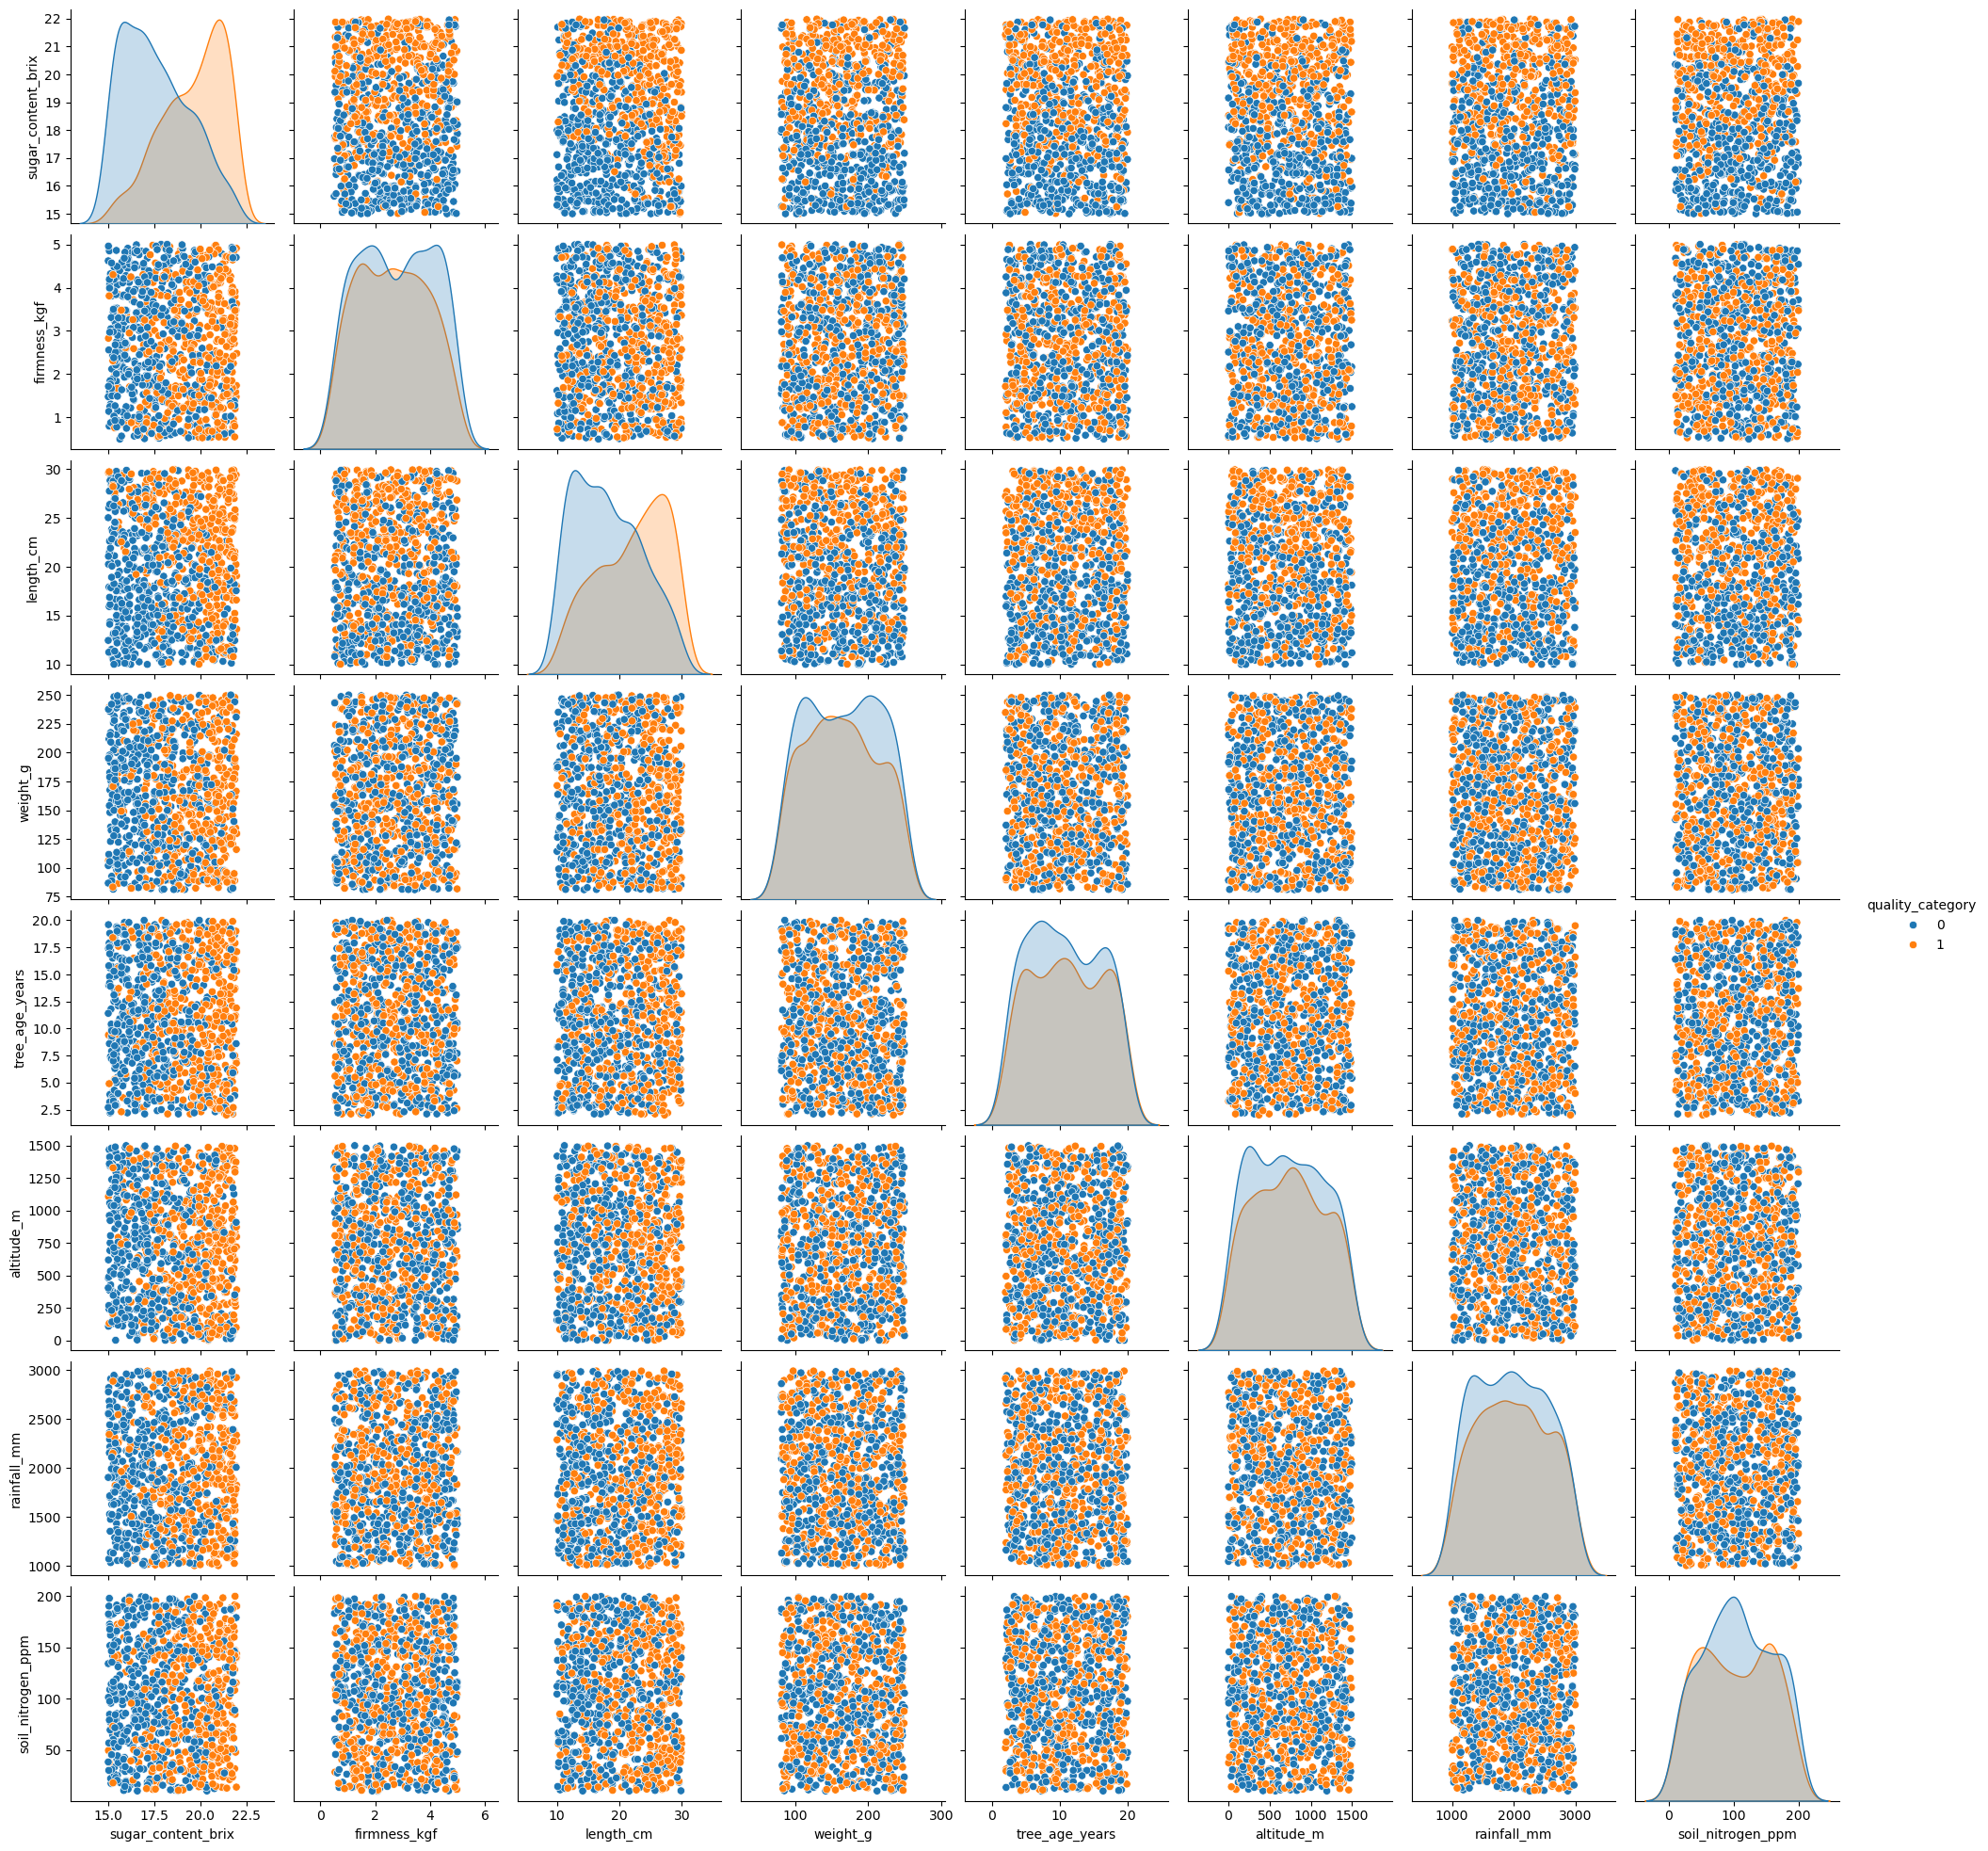

In [120]:
sns.pairplot(df, hue='quality_category')

In [121]:
df.sample(3)

variety    region  quality_category  sugar_content_brix  firmness_kgf  \
236  Blue Java   Ecuador                 1               21.25          1.49   
553   Plantain    Brazil                 1               21.63          2.77   
740    Manzano  Honduras                 1               17.56          4.57   

     length_cm  weight_g  tree_age_years  altitude_m  rainfall_mm  \
236      11.14    197.59            13.6       919.8       2405.5   
553      27.72    183.76             2.2       697.3       1826.4   
740      24.37    231.47             5.1       905.6       2198.7   

     soil_nitrogen_ppm  
236               13.6  
553              131.1  
740               11.8

## Przygotowanie danych do modelu (Standaryzacja, One-Hot Encoding, Podział na dane do trenowania i dane testowe)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

In [123]:
X = df.drop('quality_category', axis=1)
y = df['quality_category']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Regresja Logistyczna i walidacja krosowa

In [124]:
log_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegressionCV(solver='saga', penalty='l1', scoring='accuracy', Cs=np.linspace(0, 10, 20), random_state=101))
])

In [125]:
log_pipeline.fit(X_train, y_train)

c:\Users\Kamil\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:539: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
c:\Users\Kamil\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:539: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
c:\Users\Kamil\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:539: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
c:\Users\Kamil\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:539: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
c:\Users\Kamil\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:539: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sugar_content_brix',
                                                   'firmness_kgf', 'length_cm',
                                                   'weight_g', 'tree_age_years',
                                                   'altitude_m', 'rainfall_mm',
                                                   'soil_nitrogen_ppm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['variety', 'region'])])),
                ('classifier',
                 LogisticRegressionCV(Cs=array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
                                      penalty='l1', random_state=101,
                                      scoring='accuracy', solver='saga'))])

In [126]:
coef = log_pipeline.named_steps['classifier'].coef_
coef

array([[ 1.37562762, -0.03424164,  1.05982803,  0.02318496,  0.09348645,
         0.13983675,  0.06306627, -0.06470289,  0.        ,  0.        ,
         0.        ,  0.        ,  0.05772242, -0.02224111,  0.19773452,
         0.        ,  0.05815333,  0.        , -0.04790238,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [127]:
one_hot = pd.get_dummies(X).columns
coef[0].shape
features_coef = pd.Series(data=coef[0], index=one_hot)
features_coef[features_coef!=0].sort_values(axis=0)

soil_nitrogen_ppm     -0.064703
region_Costa Rica     -0.047902
firmness_kgf          -0.034242
variety_Manzano       -0.022241
weight_g               0.023185
variety_Lady Finger    0.057722
region_Brazil          0.058153
rainfall_mm            0.063066
tree_age_years         0.093486
altitude_m             0.139837
variety_Plantain       0.197735
length_cm              1.059828
sugar_content_brix     1.375628
dtype: float64

**Wartości ujemne** - spodziewamy, się że wraz ze wzrostem wartości dla danej cechy, szansa na przynależność do klasy 1 będzie maleć  
**Wartości dodatnie** - spodziewamy, się że wraz ze wzrostem wartości dla danej cechy, szansa na przynależność do klasy 1 będzie rosnąć

In [128]:
y_pred = log_pipeline.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score

In [130]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy score: {acc}\nRecall score: {recall}\nPrecision score: {precision}\nF1 score: {2*(recall*precision)/(precision+recall)}')

Accuracy score: 0.7533333333333333
Recall score: 0.6993006993006993
Precision score: 0.7633587786259542
F1 score: 0.7299270072992702


In [131]:
confusion_matrix(y_test, y_pred)

array([[126,  31],
       [ 43, 100]], dtype=int64)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       157
           1       0.76      0.70      0.73       143

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [133]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

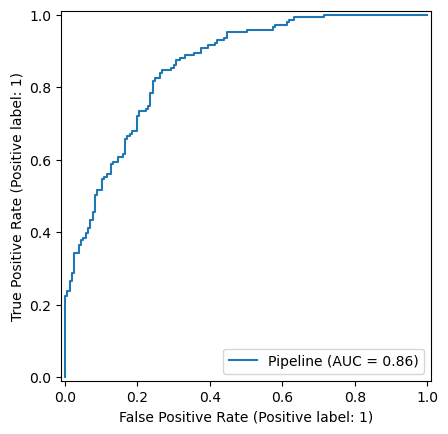

In [134]:
RocCurveDisplay.from_estimator(log_pipeline, X_test, y_test)

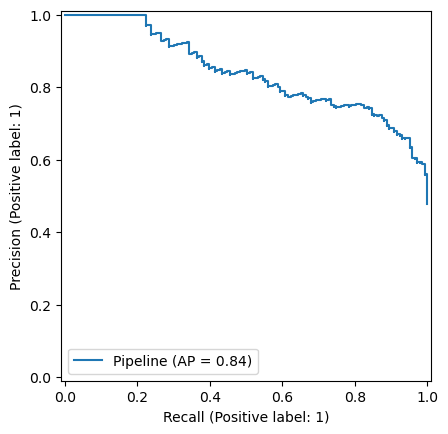

In [135]:
PrecisionRecallDisplay.from_estimator(log_pipeline, X_test, y_test)

In [136]:
log_pipeline.fit(X, y) # final model

c:\Users\Kamil\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:539: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
c:\Users\Kamil\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:539: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
c:\Users\Kamil\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:539: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
c:\Users\Kamil\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:539: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C
c:\Users\Kamil\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:539: RuntimeWarning: divide by zero encountered in scalar divide
  beta = 1.0 / C


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sugar_content_brix',
                                                   'firmness_kgf', 'length_cm',
                                                   'weight_g', 'tree_age_years',
                                                   'altitude_m', 'rainfall_mm',
                                                   'soil_nitrogen_ppm']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['variety', 'region'])])),
                ('classifier',
                 LogisticRegressionCV(Cs=array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
                                      penalty='l1', random_state=101,
                                      scoring='accuracy', solver='saga'))])

In [137]:
X.sample(6)

variety       region  sugar_content_brix  firmness_kgf  length_cm  \
915  Blue Java  Philippines               19.64          2.28      28.33   
474  Red Dacca     Honduras               18.73          4.27      23.38   
309  Blue Java       Brazil               17.42          2.59      25.67   
174       Fehi      Ecuador               16.59          0.82      27.47   
455  Red Dacca   Costa Rica               15.97          1.25      11.19   
208  Blue Java      Ecuador               17.05          2.48      11.72   

     weight_g  tree_age_years  altitude_m  rainfall_mm  soil_nitrogen_ppm  
915     94.32             5.1       367.2       1965.8              188.3  
474     81.67            14.9       597.4       2746.5              184.5  
309    231.97            16.6        46.8       2017.1               76.8  
174    155.79            11.2       145.2       2276.2               62.0  
455    116.97             5.4      1498.4       1283.2               58.7  
208    227.82             9.2       574.7       1610.8              160.5

In [138]:
sample_banana = pd.DataFrame(data=[['Burro', 'Colombia', 22.3, 4, 15.1, 155, 14, 555, 2222, 114]], columns=X.columns)
label = log_pipeline.predict(sample_banana)
prob = log_pipeline.predict_proba(sample_banana)

print(f'Etykieta: {label}\nPrawdopodobieństwo: {prob}')

Etykieta: [1]
Prawdopodobieństwo: [[0.19000743 0.80999257]]
